In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import torch
from path import Path as path
defaults.device = torch.device('cpu')

In [8]:
mypath = "part2/"
pred_path = "part1/"
dest_path = "part3/"

In [9]:
data = ImageDataBunch.from_folder(mypath, valid_pct = 0.2, size=224,ds_tfms=get_transforms()).normalize(imagenet_stats)

In [10]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [11]:
learn.load("stage1")

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (80 items)
[Category no, Category no, Category no, Category no, Category no]...
Path: part2
x: ImageItemList (80 items)
[Image (3, 720, 1280), Image (3, 160, 240), Image (3, 183, 305), Image (3, 668, 800), Image (3, 360, 480)]...
Path: part2;

Valid: LabelList
y: CategoryList (20 items)
[Category no, Category no, Category yes, Category no, Category yes]...
Path: part2
x: ImageItemList (20 items)
[Image (3, 1024, 681), Image (3, 1620, 1080), Image (3, 203, 310), Image (3, 720, 1280), Image (3, 678, 1024)]...
Path: part2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, ker

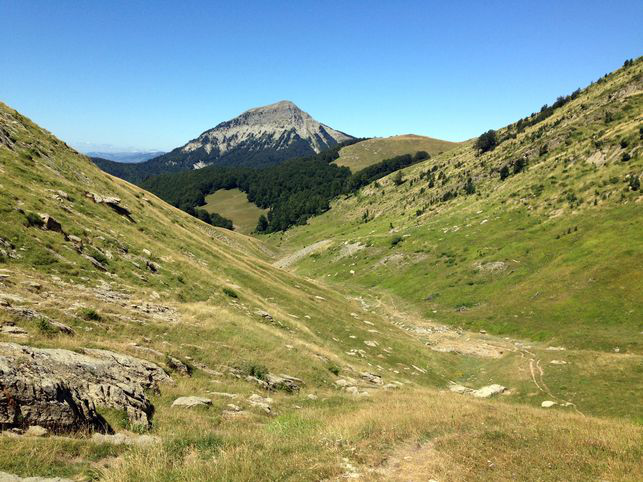

In [6]:
img = open_image("part1/00000031 (5).jpg")
img

In [10]:
str(learn.predict(img)[0])

'yes'

In [12]:
path(dest_path).mkdir_p()
for f in path(pred_path).files():
    try:
        img = open_image(f)
        pred = str(learn.predict(img)[0])
        dest = path(dest_path + "/" + pred)
        dest.mkdir_p()
        path(f).copy(dest)
    except Exception:
        print("Error in {}".format(str(f.name)))
        

Error in 00000037 (2).jpg
Error in 00000258.png
Error in 00000534 (4).jpg
Error in 00000543.jpg
